In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/pbl research/ETH-USD.csv')

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-11,1851.828369,1927.939209,1851.828369,1881.224121,1881.224121,23826986482
1,2022-08-12,1880.899170,1957.552979,1860.083496,1957.246460,1957.246460,17168141904
2,2022-08-13,1957.333984,2013.755737,1948.595215,1981.336548,1981.336548,16038975216
3,2022-08-14,1981.782471,2022.791504,1919.010132,1936.802002,1936.802002,14062754456
4,2022-08-15,1936.760498,2007.210327,1881.856812,1904.228149,1904.228149,20349931313


In [ ]:
# Drop the 'Date' column as it's not needed for modeling
data = data.drop(columns=['Date'])

In [ ]:
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
# Define the number of time steps for the GRU model
time_steps = 10  # You can adjust this according to your need

In [ ]:
# Prepare data with time steps
X = []
y = []
for i in range(len(data_scaled) - time_steps):
    X.append(data_scaled[i:i+time_steps, :])
    y.append(data_scaled[i+time_steps, 1])  # Assuming 'Open' price is the target

X = np.array(X)
y = np.array(y)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
# Build the GRU model
model = Sequential()
model.add(GRU(64, activation='sigmoid', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(GRU(64, activation='sigmoid', return_sequences=True))
model.add(GRU(64, activation='sigmoid', return_sequences=True))
model.add(GRU(64, activation='sigmoid', return_sequences=True))
model.add(GRU(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/50
5/5 [==============================] - 7s 357ms/step - loss: 0.0661 - mae: 0.2239 - val_loss: 0.0827 - val_mae: 0.2802
Epoch 2/50
5/5 [==============================] - 0s 45ms/step - loss: 0.0646 - mae: 0.2137 - val_loss: 0.0713 - val_mae: 0.2591
Epoch 3/50
5/5 [==============================] - 0s 40ms/step - loss: 0.0630 - mae: 0.2122 - val_loss: 0.0990 - val_mae: 0.3080
Epoch 4/50
5/5 [==============================] - 0s 42ms/step - loss: 0.0638 - mae: 0.2195 - val_loss: 0.1219 - val_mae: 0.3432
Epoch 5/50
5/5 [==============================] - 0s 42ms/step - loss: 0.0640 - mae: 0.2206 - val_loss: 0.1058 - val_mae: 0.3189
Epoch 6/50
5/5 [==============================] - 0s 53ms/step - loss: 0.0630 - mae: 0.2158 - val_loss: 0.0875 - val_mae: 0.2887
Epoch 7/50
5/5 [==============================] - 0s 74ms/step - loss: 0.0628 - mae: 0.2133 - val_loss: 0.0887 - val_mae: 0.2907
Epoch 8/50
5/5 [==============================] - 0s 29ms/step - loss: 0.0628 - mae: 0.2147 - va

In [ ]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error:", mae)

3/3 [==============================] - 0s 11ms/step - loss: 0.0090 - mae: 0.0861
Mean Absolute Error: 0.08606204390525818


In [1]:
# Make predictions
predictions = model.predict(X_test)

NameError: ignored

In [ ]:
# Inverse transform the predictions and true values to the original scale
predictions = scaler.inverse_transform(np.concatenate((X_test[:, -1, 1:], predictions), axis=1))[:, -1]
true_values = scaler.inverse_transform(np.concatenate((X_test[:, -1, 1:], y_test.reshape(-1, 1)), axis=1))[:, -1]

In [ ]:
import matplotlib.pyplot as plt

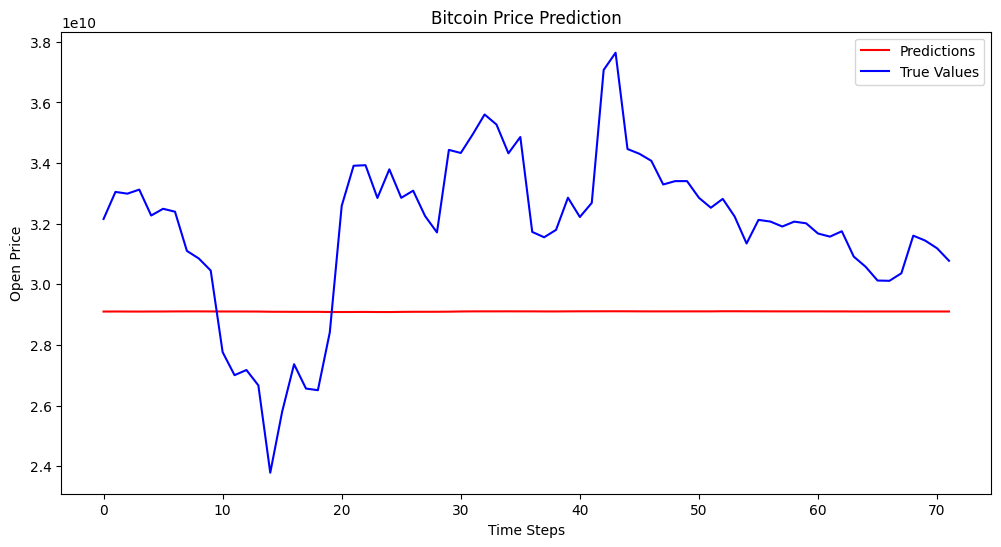

In [ ]:
# Plot predictions vs. true values
plt.figure(figsize=(12, 6))
plt.plot(predictions, label='Predictions', color='red')
plt.plot(true_values, label='True Values', color='blue')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Open Price')
plt.legend()
plt.show()

In [ ]:
# Calculate percentage error
percentage_error = (abs(predictions - true_values) / true_values) * 100

# Print the percentage error
for i, error in enumerate(percentage_error):
    print(f"Sample {i+1}: Percentage Error = {error:.2f}%")

# Calculate and print the mean percentage error
mean_percentage_error = np.mean(percentage_error)
print("\nMean Percentage Error:", mean_percentage_error)

Sample 1: Percentage Error = 9.49%
Sample 2: Percentage Error = 11.94%
Sample 3: Percentage Error = 11.79%
Sample 4: Percentage Error = 12.15%
Sample 5: Percentage Error = 9.82%
Sample 6: Percentage Error = 10.43%
Sample 7: Percentage Error = 10.15%
Sample 8: Percentage Error = 6.41%
Sample 9: Percentage Error = 5.66%
Sample 10: Percentage Error = 4.43%
Sample 11: Percentage Error = 4.83%
Sample 12: Percentage Error = 7.78%
Sample 13: Percentage Error = 7.10%
Sample 14: Percentage Error = 9.13%
Sample 15: Percentage Error = 22.33%
Sample 16: Percentage Error = 12.77%
Sample 17: Percentage Error = 6.32%
Sample 18: Percentage Error = 9.53%
Sample 19: Percentage Error = 9.75%
Sample 20: Percentage Error = 2.36%
Sample 21: Percentage Error = 10.75%
Sample 22: Percentage Error = 14.22%
Sample 23: Percentage Error = 14.26%
Sample 24: Percentage Error = 11.45%
Sample 25: Percentage Error = 13.93%
Sample 26: Percentage Error = 11.45%
Sample 27: Percentage Error = 12.07%
Sample 28: Percentage E

In [ ]:
# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and true values to the original scale
predictions = scaler.inverse_transform(np.concatenate((X_test[:, -1, 1:], predictions), axis=1))[:, -1]
true_values = scaler.inverse_transform(np.concatenate((X_test[:, -1, 1:], y_test.reshape(-1, 1)), axis=1))[:, -1]

# Define a threshold for investment decision
invest_threshold = 1.0  # You can adjust this threshold as needed

3/3 [==============================] - 0s 6ms/step


In [ ]:
# Determine investment decisions and print the results
for i in range(len(predictions)):
    if predictions[i] > X_test[i, -1, 1] * invest_threshold:
        decision = "Invest"
    else:
        decision = "Do not invest"

    print(f"Predicted Price: {predictions[i]:.2f} | Current Open Price: {X_test[i, -1, 1]:.2f} | Decision: {decision}")

Predicted Price: 29103554350.52 | Current Open Price: 0.77 | Decision: Invest
Predicted Price: 29105428387.60 | Current Open Price: 0.75 | Decision: Invest
Predicted Price: 29103807215.55 | Current Open Price: 0.77 | Decision: Invest
Predicted Price: 29102939912.14 | Current Open Price: 0.77 | Decision: Invest
Predicted Price: 29104868303.38 | Current Open Price: 0.77 | Decision: Invest
Predicted Price: 29105220423.84 | Current Open Price: 0.75 | Decision: Invest
Predicted Price: 29108120100.37 | Current Open Price: 0.76 | Decision: Invest
Predicted Price: 29109098475.34 | Current Open Price: 0.76 | Decision: Invest
Predicted Price: 29108755807.78 | Current Open Price: 0.72 | Decision: Invest
Predicted Price: 29107413496.23 | Current Open Price: 0.72 | Decision: Invest
Predicted Price: 29105556001.72 | Current Open Price: 0.71 | Decision: Invest
Predicted Price: 29105643441.03 | Current Open Price: 0.64 | Decision: Invest
Predicted Price: 29104917931.09 | Current Open Price: 0.62 | Dec

In [ ]:
# Calculate daily price changes for true values and predictions
true_price_changes = true_values[1:] - true_values[:-1]
predicted_price_changes = predictions[1:] - true_values[:-1]

# Define a threshold for considering a change as profitable or in loss
profit_threshold = 0.0  # You can adjust this threshold based on your preference

# Calculate whether the predictions are in profit or loss
profit_or_loss = np.where(predicted_price_changes > profit_threshold, 'Profit', 'Loss')

# Print whether each prediction is in profit or loss
for i in range(len(profit_or_loss)):
    print(f"Prediction {i+1}: {profit_or_loss[i]}")

Prediction 1: Loss
Prediction 2: Loss
Prediction 3: Loss
Prediction 4: Loss
Prediction 5: Loss
Prediction 6: Loss
Prediction 7: Loss
Prediction 8: Loss
Prediction 9: Loss
Prediction 10: Loss
Prediction 11: Profit
Prediction 12: Profit
Prediction 13: Profit
Prediction 14: Profit
Prediction 15: Profit
Prediction 16: Profit
Prediction 17: Profit
Prediction 18: Profit
Prediction 19: Profit
Prediction 20: Profit
Prediction 21: Loss
Prediction 22: Loss
Prediction 23: Loss
Prediction 24: Loss
Prediction 25: Loss
Prediction 26: Loss
Prediction 27: Loss
Prediction 28: Loss
Prediction 29: Loss
Prediction 30: Loss
Prediction 31: Loss
Prediction 32: Loss
Prediction 33: Loss
Prediction 34: Loss
Prediction 35: Loss
Prediction 36: Loss
Prediction 37: Loss
Prediction 38: Loss
Prediction 39: Loss
Prediction 40: Loss
Prediction 41: Loss
Prediction 42: Loss
Prediction 43: Loss
Prediction 44: Loss
Prediction 45: Loss
Prediction 46: Loss
Prediction 47: Loss
Prediction 48: Loss
Prediction 49: Loss
Predictio

In [ ]:
# Define a threshold for considering a trade profitable or in loss
profit_threshold = 0.02  # 2% profit
loss_threshold = -0.02   # 2% loss

# Calculate the price change from the previous day
price_change = true_values[1:] - true_values[:-1]

# Initialize lists to store trade decisions
trade_actions = []
trade_results = []

# Loop through the predictions and calculate trade decisions
for i in range(len(predictions)):
    if i == 0:
        trade_actions.append("HOLD")
        trade_results.append("N/A")
    else:
        if (predictions[i] - true_values[i-1]) / true_values[i-1] > profit_threshold:
            trade_actions.append("SELL")
            trade_results.append("Profit")
        elif (predictions[i] - true_values[i-1]) / true_values[i-1] < loss_threshold:
            trade_actions.append("SELL")
            trade_results.append("Loss")
        else:
            trade_actions.append("HOLD")
            trade_results.append("N/A")

# Print the trade decisions along with the results
for i in range(len(predictions)):
    print(f"Prediction: {predictions[i]:.2f}, True Value: {true_values[i]:.2f}, Action: {trade_actions[i]}, Result: {trade_results[i]}")

Prediction: 29103554350.52, True Value: 32156155847.28, Action: HOLD, Result: N/A
Prediction: 29105428387.60, True Value: 33050246060.43, Action: SELL, Result: Loss
Prediction: 29103807215.55, True Value: 32992568933.37, Action: SELL, Result: Loss
Prediction: 29102939912.14, True Value: 33126581621.79, Action: SELL, Result: Loss
Prediction: 29104868303.38, True Value: 32272414326.65, Action: SELL, Result: Loss
Prediction: 29105220423.84, True Value: 32493515723.61, Action: SELL, Result: Loss
Prediction: 29108120100.37, True Value: 32397917379.55, Action: SELL, Result: Loss
Prediction: 29109098475.34, True Value: 31103785851.09, Action: SELL, Result: Loss
Prediction: 29108755807.78, True Value: 30853809609.11, Action: SELL, Result: Loss
Prediction: 29107413496.23, True Value: 30456166516.74, Action: SELL, Result: Loss
Prediction: 29105556001.72, True Value: 27765216954.52, Action: SELL, Result: Loss
Prediction: 29105643441.03, True Value: 27005231321.80, Action: SELL, Result: Profit
Pre